In [40]:
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

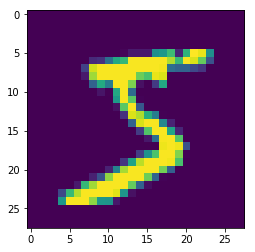

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
plt.imshow(X_train[0])

In [45]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [21]:
X_train[0].shape

(28, 28, 1)

In [22]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [35]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=1000, epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 143s 2ms/step - loss: 3.6031 - acc: 0.7031 - val_loss: 0.2281 - val_acc: 0.9367
Epoch 2/3
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1290 - acc: 0.9606 - val_loss: 0.0902 - val_acc: 0.9719
Epoch 3/3
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0615 - acc: 0.9813 - val_loss: 0.0767 - val_acc: 0.9750


In [37]:
for pr in model.predict_classes(X_test[:4]):
    print(pr)

7
2
1
0


In [38]:
import numpy as np
for pr in y_test[:4]:
    print(np.argmax(pr))

7
2
1
0


In [3]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________